In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
import seaborn as sns
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have no NA values which is good

Class as pie chart:


Text(0,0.5,'')

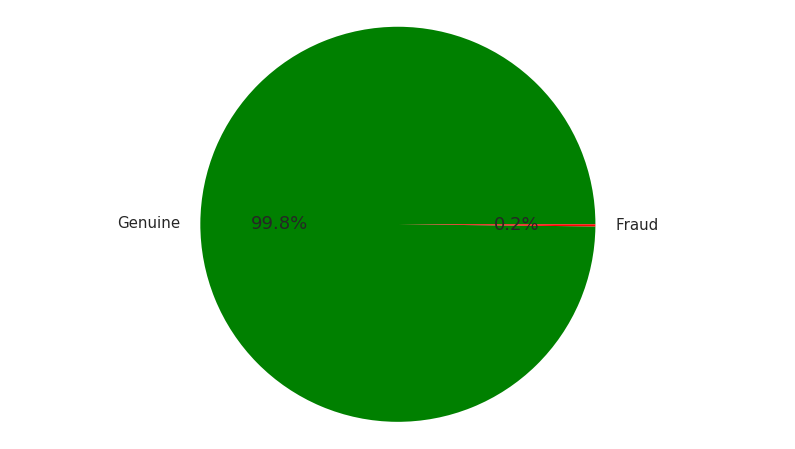

In [4]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','r'])
plt.axis('equal')
plt.ylabel('')

Our dataset is very unbalanced. We have to do something about it

# Undersampling

Our goal here is to delete instances from the over-represented class

In [5]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
y_train = df_train['Class']
y_test = df_test['Class']

X_train = df_train.drop(['Class'], axis=1)
X_test = df_test.drop(['Class'], axis=1)

print(X.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10     ...           V20       V21       V22  \
0  0.098698  0.363787  0.090794     ...      0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974     ...     -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643     ...      0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952     ...     -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074     ...      0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  normAmount  
0 -0.11047

In [7]:
# Number of data points in the minority class
number_records_fraud = len(df_train_train[df_train_train.Class == 1])
fraud_indices = np.array(df_train[df_train.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df_train[df_train.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df_train.iloc[under_sample_indices,:]

y_undersample = under_sample_data['Class']
X_undersample = under_sample_data.drop(['Class'], axis=1)

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Now we have as much frauds than genuines

In [8]:
# Let's do a train_test_split on these data

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0
)

Now we will try some algorithms with GridSearch

### Logistic Regression

First let's build our model around the undersampled data

In [9]:
lr_param_C = [0.01,0.1,1,10,100]
lr_param_grid = {'C': lr_param_C, 'penalty': ['l1']}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid)
lr_grid_search.fit(X_train_under, y_train_under)

print('Logistic Regression')
print('The best score with GridSearch for Logistic Regression is :', lr_grid_search.best_score_)
print('The best parameters with GridSearch for Logistic Regression are :', lr_grid_search.best_params_)

lr_best_params = lr_grid_search.best_params_

lr = LogisticRegression(C=lr_best_params['C'], penalty='l1')
lr.fit(X_train_under, y_train_under)
lr_train_score = lr.score(X_train_under, y_train_under)
lr_test_score = lr.score(X_test_under, y_test_under)
print  ('Logistic Regression train score =', lr_train_score)
print  ('Logistic Regression test score = ', lr_test_score)

Logistic Regression
The best score with GridSearch for Logistic Regression is : 0.947674418605
The best parameters with GridSearch for Logistic Regression are : {'C': 10, 'penalty': 'l1'}
Logistic Regression train score = 0.956395348837
Logistic Regression test score =  0.949324324324


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.938775510204


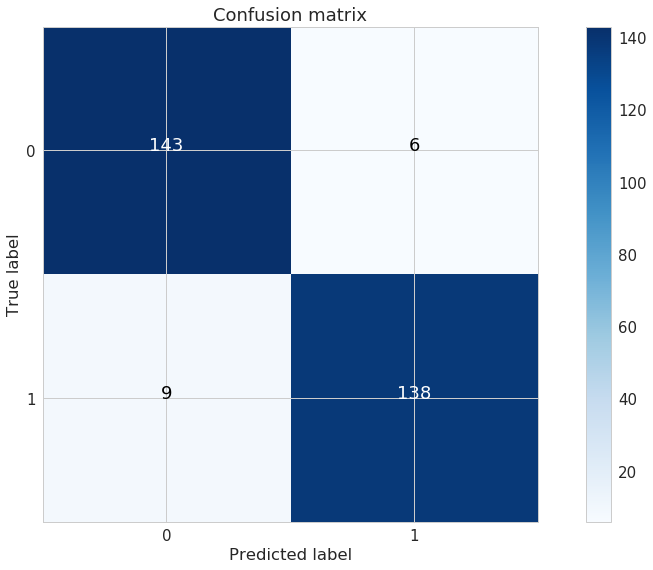

In [11]:
y_pred_undersample_lr = lr.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under,y_pred_undersample_lr)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.930894308943
             precision    recall  f1-score   support

          0       1.00      0.96      0.98    284315
          1       0.03      0.93      0.07       492

avg / total       1.00      0.96      0.98    284807



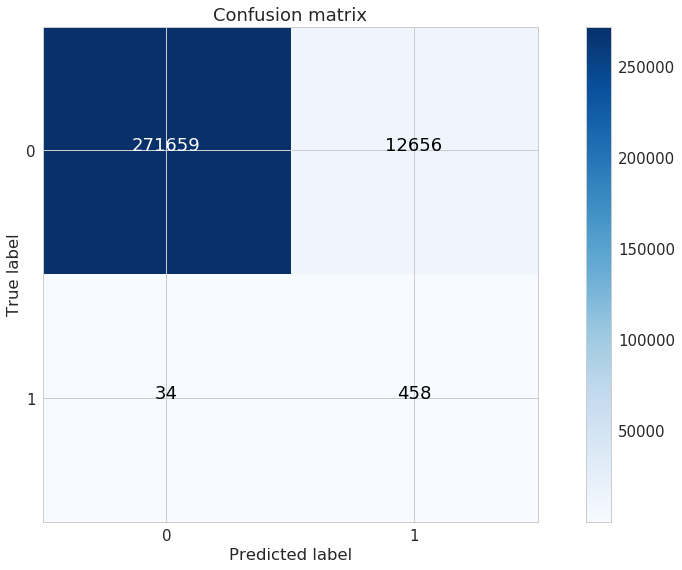

In [12]:
y_pred = lr.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### SVM

SVC :
The best score with GridSearch for SVC is : 0.927325581395
The best parameters with GridSearch for SVC are : {'C': 1}
SVC train score = 0.960755813953
SVC test score =  0.939189189189
Recall metric in the testing dataset:  0.91156462585


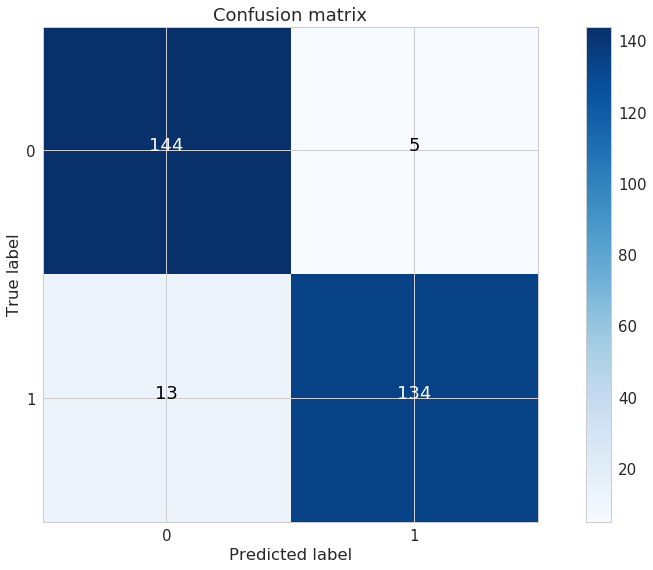

In [13]:
svc_param_C = [0.01,0.1,1,10,100]
svc_param_grid = {'C': svc_param_C}

svc_grid_search = GridSearchCV(SVC(), svc_param_grid)
svc_grid_search.fit(X_train_under, y_train_under)

print('SVC :')
print('The best score with GridSearch for SVC is :', svc_grid_search.best_score_)
print('The best parameters with GridSearch for SVC are :', svc_grid_search.best_params_)

svc_best_params = svc_grid_search.best_params_

svc = SVC(C=svc_best_params['C'])
svc.fit(X_train_under, y_train_under)
svc_train_score = svc.score(X_train_under, y_train_under)
svc_test_score = svc.score(X_test_under, y_test_under)
print  ('SVC train score =', svc_train_score)
print  ('SVC test score = ', svc_test_score)

y_pred_undersample_svc = svc.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_svc)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.922764227642
             precision    recall  f1-score   support

          0       1.00      0.94      0.97    284315
          1       0.03      0.92      0.05       492

avg / total       1.00      0.94      0.97    284807



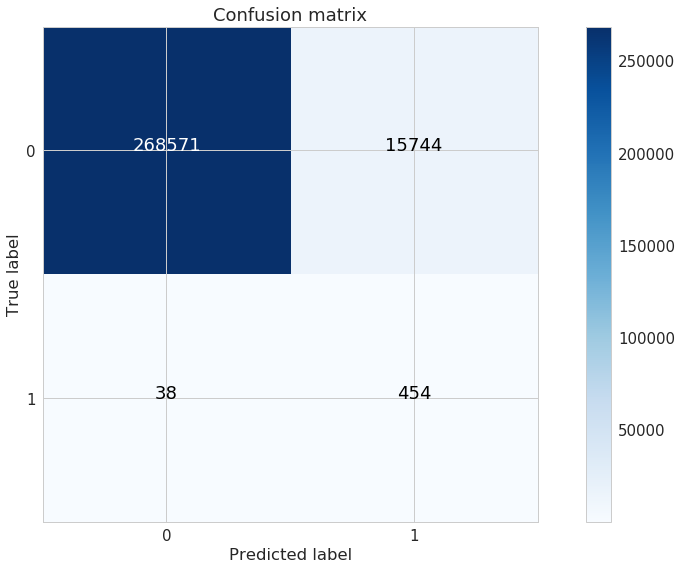

In [14]:
y_pred_svc = svc.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_svc))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Random Forest

rf :
The best score with GridSearch for rf is : 0.934593023256
The best parameters with GridSearch for rf are : {'n_estimators': 100}
rf train score = 1.0
rf test score =  0.945945945946
Recall metric in the testing dataset:  0.91156462585


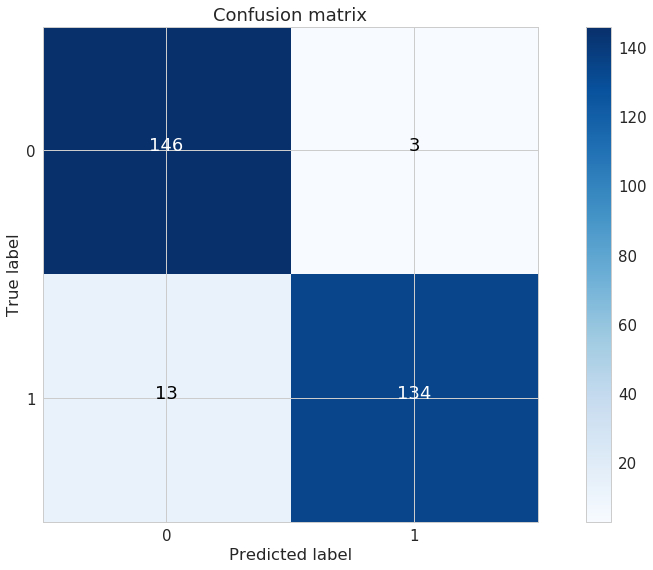

In [15]:
rf_param_n_estimator = [1,10,100]
rf_param_grid = {'n_estimators': rf_param_n_estimator}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_grid_search.fit(X_train_under, y_train_under)

print('rf :')
print('The best score with GridSearch for rf is :', rf_grid_search.best_score_)
print('The best parameters with GridSearch for rf are :', rf_grid_search.best_params_)

rf_best_params = rf_grid_search.best_params_

rf = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'])
rf.fit(X_train_under, y_train_under)
rf_train_score = rf.score(X_train_under, y_train_under)
rf_test_score = rf.score(X_test_under, y_test_under)
print  ('rf train score =', rf_train_score)
print  ('rf test score = ', rf_test_score)

y_pred_undersample_rf = rf.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_rf)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.973577235772
             precision    recall  f1-score   support

          0       1.00      0.97      0.98    284315
          1       0.05      0.97      0.10       492

avg / total       1.00      0.97      0.98    284807



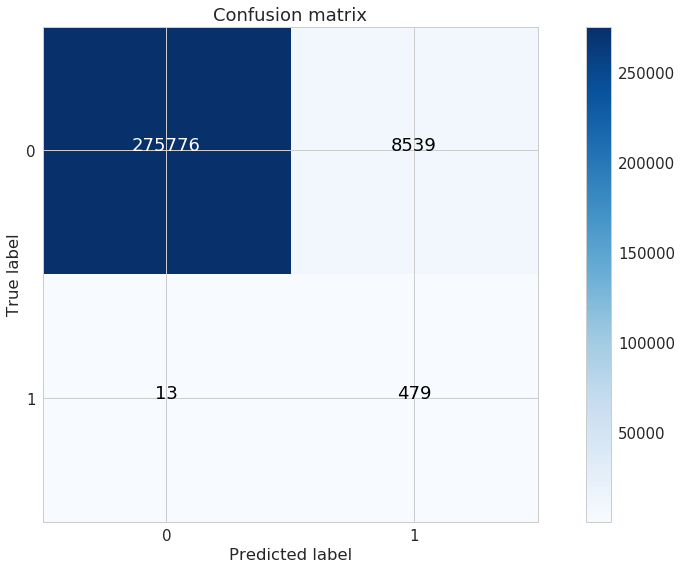

In [16]:
y_pred_rf = rf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_rf)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_rf))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### XGBoost

xgb train score = 0.946220930233
xgb test score =  0.935810810811
Recall metric in the testing dataset:  0.884353741497


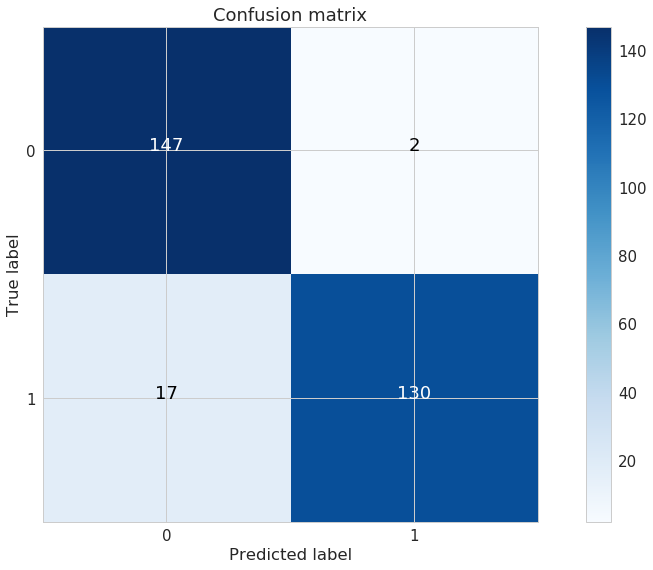

In [17]:
_test
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

xgb_rs_params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgb_rs = XGBClassifier(nthreads=-1)  
gs = RandomizedSearchCV(xgb_rs, xgb_rs_params, n_jobs=1)  
xgb_best_model = gs.fit(X_train_under, y_train_under)  

xgb_train_score = xgb_best_model.score(X_train_under, y_train_under)
xgb_test_score = xgb_best_model.score(X_test_under, y_test_under)

print  ('xgb train score =', xgb_train_score)
print  ('xgb test score = ', xgb_test_score)

y_pred_undersample_xgb = xgb_best_model.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_xgb)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.89837398374
             precision    recall  f1-score   support

          0       1.00      0.98      0.99    284315
          1       0.06      0.90      0.11       492

avg / total       1.00      0.98      0.99    284807



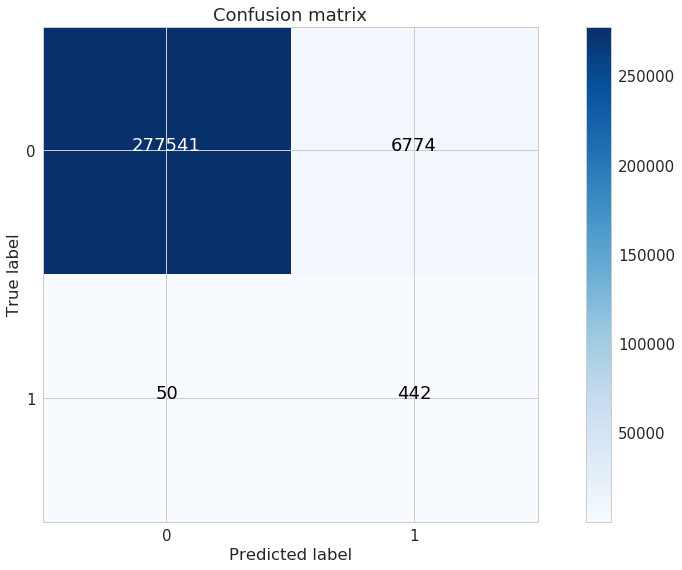

In [18]:
y_pred_xgb = xgb_best_model.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_xgb)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_xgb))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Neural Networks

In [19]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [24]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    
    return recall

def getModel():
    model = Sequential()
    
    model.add(Dense(16, input_dim=29))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(18))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(24))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', recall])
    
    
    return model

def get_callbacks(model_filepath, log_dir, patience=10):
    earlystopping = EarlyStopping('val_loss', patience=patience, mode="min")
    checkpointer = ModelCheckpoint(filepath=model_filepath,
                               verbose=0,
                               save_best_only=True)
    tensorboard = TensorBoard(log_dir=log_dir,
                              histogram_freq=0,
                              write_graph=True,
                              write_images=True)
    return [earlystopping, checkpointer, tensorboard]
file_path_feed_forward = ".model_weights_feed_forward.hdf5"
log_dir_feed_forward = './logs/feed_forward'
callbacks_feed_forward = get_callbacks(file_path_feed_forward, log_dir_feed_forward, patience=100)

In [25]:
X_train_under_array = X_train_under.as_matrix()
y_train_under_array = y_train_under.as_matrix()
X_test_under_array = X_test_under.as_matrix()
y_test_under_array = y_test_under.as_matrix()

In [26]:
import os
model=getModel()
model.fit(X_train_under_array, y_train_under_array,
          batch_size=24,
          epochs=1000,
          verbose=1,
          validation_data=(X_test_under_array, y_test_under_array),
          callbacks=callbacks_feed_forward)

Train on 688 samples, validate on 296 samples
Epoch 1/1000
688/688 [==============================] - 0s 718us/step - loss: 0.6746 - acc: 0.5087 - recall: 0.8827 - val_loss: 0.5561 - val_acc: 0.5405 - val_recall: 0.9842
Epoch 2/1000
688/688 [==============================] - 0s 231us/step - loss: 0.5870 - acc: 0.5814 - recall: 0.8881 - val_loss: 0.5073 - val_acc: 0.7095 - val_recall: 0.9242
Epoch 3/1000
688/688 [==============================] - 0s 222us/step - loss: 0.5367 - acc: 0.6759 - recall: 0.9028 - val_loss: 0.4588 - val_acc: 0.8514 - val_recall: 0.9116
Epoch 4/1000
688/688 [==============================] - 0s 230us/step - loss: 0.5065 - acc: 0.7049 - recall: 0.8412 - val_loss: 0.4225 - val_acc: 0.8986 - val_recall: 0.8837
Epoch 5/1000
688/688 [==============================] - 0s 220us/step - loss: 0.4578 - acc: 0.7863 - recall: 0.8374 - val_loss: 0.3824 - val_acc: 0.9155 - val_recall: 0.8869
Epoch 6/1000
688/688 [==============================] - 0s 235us/step - loss: 0.4132

688/688 [==============================] - 0s 185us/step - loss: 0.1465 - acc: 0.9433 - recall: 0.9154 - val_loss: 0.1621 - val_acc: 0.9392 - val_recall: 0.9116
Epoch 48/1000
688/688 [==============================] - 0s 177us/step - loss: 0.1340 - acc: 0.9477 - recall: 0.9275 - val_loss: 0.1625 - val_acc: 0.9392 - val_recall: 0.9116
Epoch 49/1000
688/688 [==============================] - 0s 194us/step - loss: 0.1270 - acc: 0.9506 - recall: 0.9255 - val_loss: 0.1636 - val_acc: 0.9426 - val_recall: 0.9174
Epoch 50/1000
688/688 [==============================] - 0s 188us/step - loss: 0.1549 - acc: 0.9578 - recall: 0.9408 - val_loss: 0.1649 - val_acc: 0.9358 - val_recall: 0.9062
Epoch 51/1000
688/688 [==============================] - 0s 179us/step - loss: 0.1599 - acc: 0.9404 - recall: 0.9107 - val_loss: 0.1610 - val_acc: 0.9392 - val_recall: 0.9116
Epoch 52/1000
688/688 [==============================] - 0s 182us/step - loss: 0.1349 - acc: 0.9491 - recall: 0.9161 - val_loss: 0.1618 - v

Epoch 94/1000
688/688 [==============================] - 0s 188us/step - loss: 0.0899 - acc: 0.9680 - recall: 0.9648 - val_loss: 0.1879 - val_acc: 0.9358 - val_recall: 0.9220
Epoch 95/1000
688/688 [==============================] - 0s 191us/step - loss: 0.1041 - acc: 0.9637 - recall: 0.9419 - val_loss: 0.1878 - val_acc: 0.9324 - val_recall: 0.9220
Epoch 96/1000
688/688 [==============================] - 0s 173us/step - loss: 0.0856 - acc: 0.9724 - recall: 0.9578 - val_loss: 0.1908 - val_acc: 0.9324 - val_recall: 0.9274
Epoch 97/1000
688/688 [==============================] - 0s 188us/step - loss: 0.0880 - acc: 0.9622 - recall: 0.9433 - val_loss: 0.1933 - val_acc: 0.9324 - val_recall: 0.9274
Epoch 98/1000
688/688 [==============================] - 0s 183us/step - loss: 0.0922 - acc: 0.9666 - recall: 0.9675 - val_loss: 0.1960 - val_acc: 0.9358 - val_recall: 0.9274
Epoch 99/1000
688/688 [==============================] - 0s 186us/step - loss: 0.0842 - acc: 0.9695 - recall: 0.9658 - val_lo

688/688 [==============================] - 0s 195us/step - loss: 0.0682 - acc: 0.9797 - recall: 0.9729 - val_loss: 0.2733 - val_acc: 0.9358 - val_recall: 0.9332
Epoch 141/1000
688/688 [==============================] - 0s 190us/step - loss: 0.0723 - acc: 0.9767 - recall: 0.9679 - val_loss: 0.2732 - val_acc: 0.9324 - val_recall: 0.9274
Epoch 142/1000
688/688 [==============================] - 0s 192us/step - loss: 0.0737 - acc: 0.9782 - recall: 0.9726 - val_loss: 0.2693 - val_acc: 0.9324 - val_recall: 0.9274
Epoch 143/1000
688/688 [==============================] - 0s 187us/step - loss: 0.0547 - acc: 0.9840 - recall: 0.9814 - val_loss: 0.2831 - val_acc: 0.9291 - val_recall: 0.9220
Epoch 144/1000
688/688 [==============================] - 0s 189us/step - loss: 0.0680 - acc: 0.9753 - recall: 0.9624 - val_loss: 0.2783 - val_acc: 0.9324 - val_recall: 0.9278
Epoch 145/1000
688/688 [==============================] - 0s 192us/step - loss: 0.0721 - acc: 0.9724 - recall: 0.9568 - val_loss: 0.274

In [27]:
score = model.evaluate(X_test.as_matrix(), y_test.as_matrix(), batch_size=24)
print('Original dataset loss:', score[0])
print('Original dataset accuracy:', score[1])

284807/284807 [==============================] - 14s 47us/step
Original dataset loss: 0.160595778259
Original dataset accuracy: 0.953916156891


In [28]:
y_pred_dl = model.predict(X_test.as_matrix(), batch_size=24, verbose=1)

284807/284807 [==============================] - 8s 29us/step


Recall : 0.971544715447
             precision    recall  f1-score   support

          0       1.00      0.95      0.98    284315
          1       0.04      0.97      0.07       492

avg / total       1.00      0.95      0.97    284807



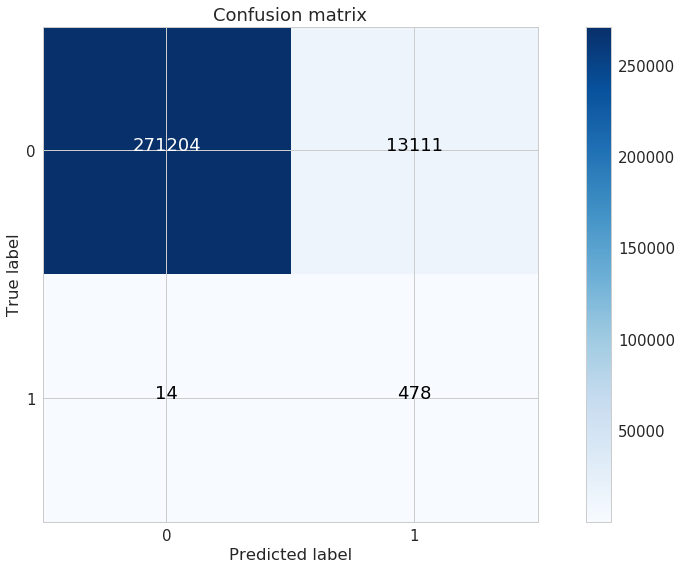

In [29]:
confuction_matrix_dl = confusion_matrix(y_test.as_matrix(), np.round(y_pred_dl))
# print(confuction_matrix_dl)
print('Recall :', confuction_matrix_dl[1,1]/(confuction_matrix_dl[1,0]+confuction_matrix_dl[1,1]))
print(metrics.classification_report(y_test.as_matrix(), np.round(y_pred_dl)))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confuction_matrix_dl
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Unsupervised Learning

#### Preprocessing

In [30]:
X_train_good = X_train[y_train == 0]
X_test_good = X_test[y_test == 0]

### One-Class SVM

In [31]:
# Instantiate normalisation 
# nrm = MinMaxScaler()

In [32]:
# one_svm = OneClassSVM(random_state=2008, nu=0.2) # Nu set by trial and error
# svm_pl = Pipeline([('Normalise', nrm),
#                    ('SVM', one_svm)])
# svm_pl.fit(X_train_good)

In [33]:
# preds = svm_pl.predict(X_test)  
# preds = ((preds * -1) + 1) / 2

# print(metrics.classification_report(y_test, preds))
# confuction_matrix_dl = confusion_matrix(y_test, preds)
# print(confuction_matrix_dl)

### Autoencoder

#### Building the model

In [34]:
input_dim = X_train.shape[1]
encoding_dim = 14
nb_epoch = 200
batch_size = 32

In [35]:
def getAutoEncoderModel(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim, activation="tanh", 
                    activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

    decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
    decoder = Dense(input_dim, activation='relu')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
    
    return autoencoder

In [36]:
file_path_autoencoder = ".model_weights_autoencoder.hdf5"
log_dir_autoencoder = './logs/autoencoder'
callbacks_autoencoder = get_callbacks(file_path_autoencoder, log_dir_autoencoder, patience=10)

autoencoder = getAutoEncoderModel(input_dim, encoding_dim)
history = autoencoder.fit(X_train_good, X_train_good,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_good, X_test_good),
                    verbose=1,
                    callbacks=callbacks_autoencoder).history

Train on 227454 samples, validate on 56861 samples
Epoch 1/200
227454/227454 [==============================] - 22s 97us/step - loss: 0.8033 - acc: 0.5845 - val_loss: 0.7771 - val_acc: 0.6514
Epoch 2/200
227454/227454 [==============================] - 21s 94us/step - loss: 0.7374 - acc: 0.6599 - val_loss: 0.7559 - val_acc: 0.6649
Epoch 3/200
227454/227454 [==============================] - 22s 95us/step - loss: 0.7230 - acc: 0.6669 - val_loss: 0.7474 - val_acc: 0.6714
Epoch 4/200
227454/227454 [==============================] - 22s 95us/step - loss: 0.7159 - acc: 0.6722 - val_loss: 0.7409 - val_acc: 0.6762
Epoch 5/200
227454/227454 [==============================] - 21s 94us/step - loss: 0.7115 - acc: 0.6784 - val_loss: 0.7375 - val_acc: 0.6814
Epoch 6/200
227454/227454 [==============================] - 21s 91us/step - loss: 0.7092 - acc: 0.6811 - val_loss: 0.7355 - val_acc: 0.6806
Epoch 7/200
227454/227454 [==============================] - 21s 91us/step - loss: 0.7074 - acc: 0.6837

227454/227454 [==============================] - 19s 82us/step - loss: 0.6956 - acc: 0.7067 - val_loss: 0.7251 - val_acc: 0.7057
Epoch 59/200
227454/227454 [==============================] - 19s 82us/step - loss: 0.6959 - acc: 0.7065 - val_loss: 0.7220 - val_acc: 0.7116
Epoch 60/200
227454/227454 [==============================] - 19s 81us/step - loss: 0.6956 - acc: 0.7064 - val_loss: 0.7215 - val_acc: 0.7131
Epoch 61/200
227454/227454 [==============================] - 20s 87us/step - loss: 0.6956 - acc: 0.7069 - val_loss: 0.7229 - val_acc: 0.7085
Epoch 62/200
227454/227454 [==============================] - 20s 89us/step - loss: 0.6955 - acc: 0.7069 - val_loss: 0.7215 - val_acc: 0.7115
Epoch 63/200
227454/227454 [==============================] - 20s 86us/step - loss: 0.6953 - acc: 0.7068 - val_loss: 0.7239 - val_acc: 0.7028
Epoch 64/200
227454/227454 [==============================] - 19s 85us/step - loss: 0.6954 - acc: 0.7060 - val_loss: 0.7253 - val_acc: 0.6997
Epoch 65/200
227454

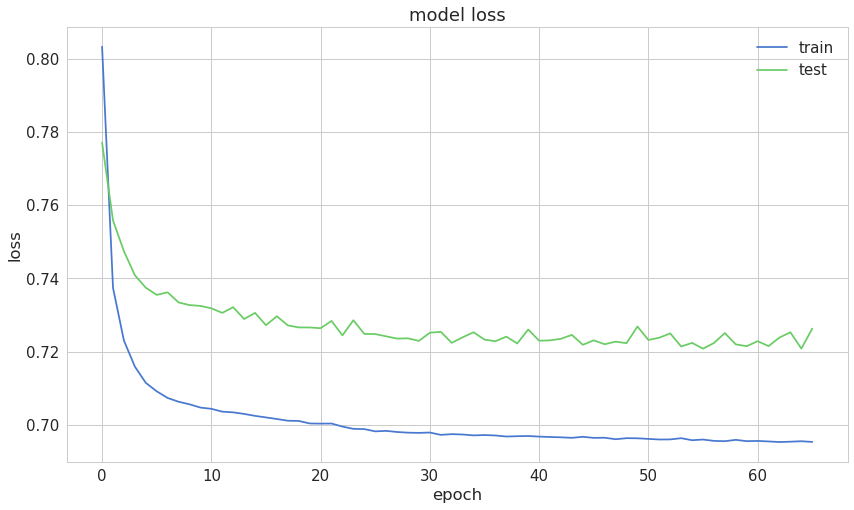

In [47]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [48]:
autoe_preds = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - autoe_preds, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.740323,0.001727
std,4.666669,0.041527
min,0.035765,0.000000
25%,0.241982,0.000000
50%,0.386433,0.000000
75%,0.619789,0.000000
max,1599.350676,1.000000


#### Reconstruction error without fraud

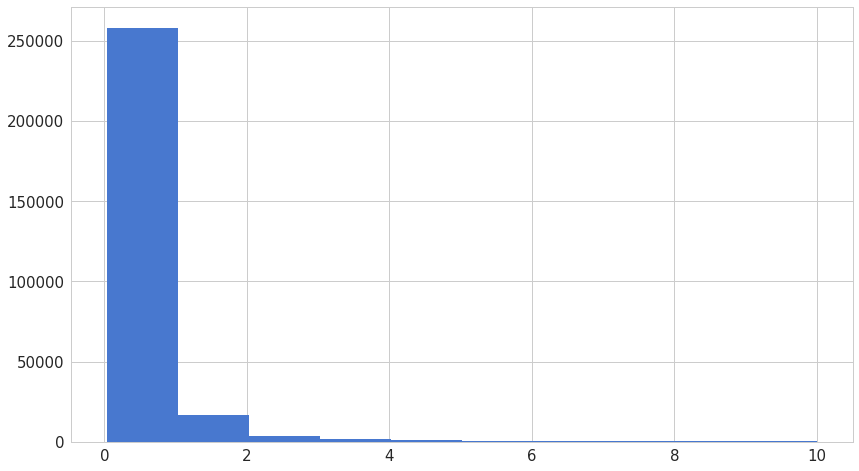

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

#### Reconstruction error with fraud

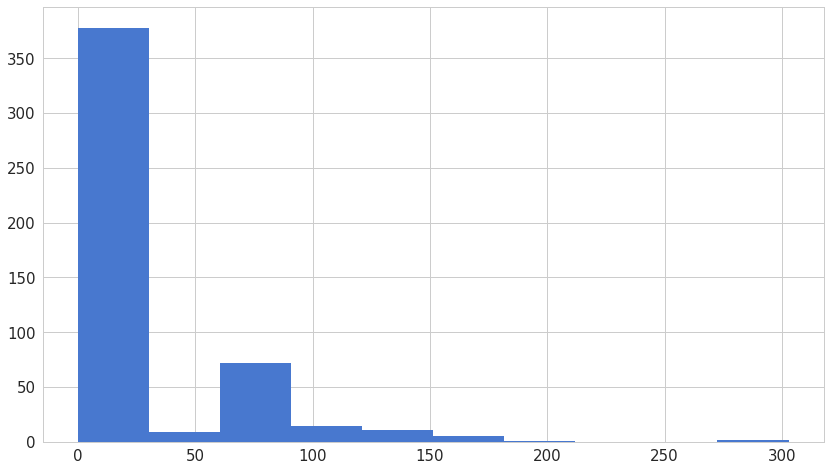

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

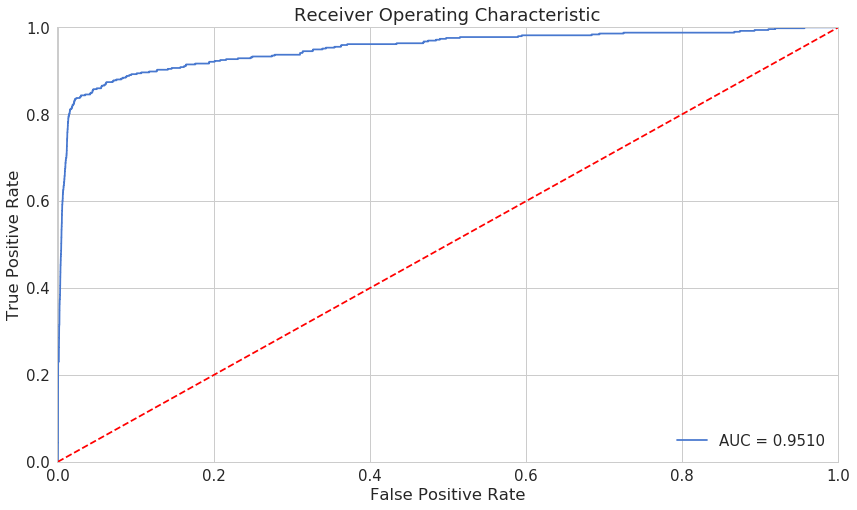

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

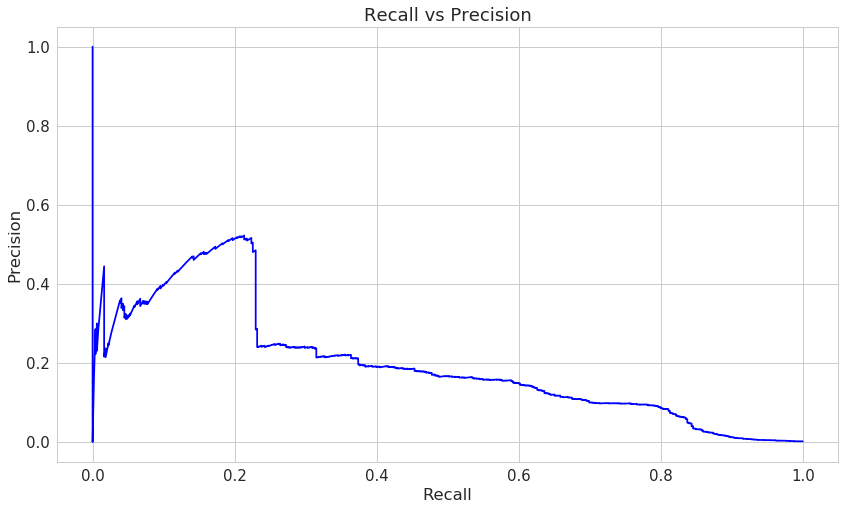

In [52]:
precision, recall, th = metrics.precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

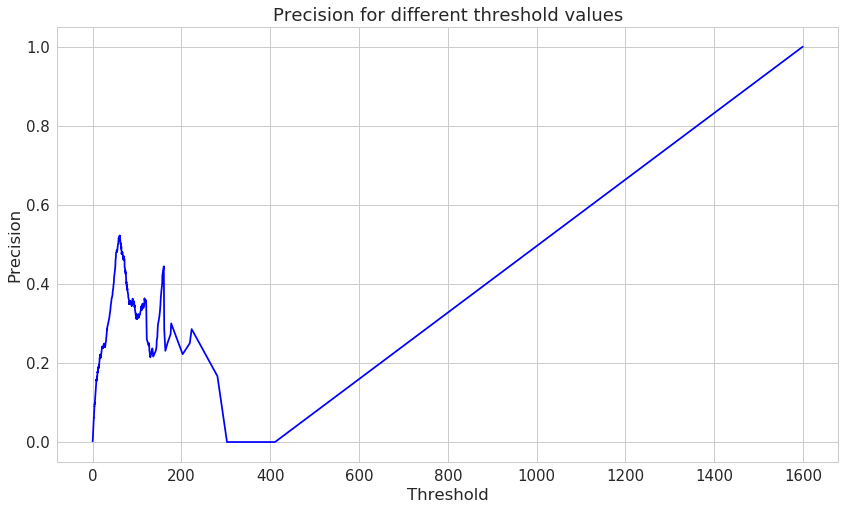

In [53]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

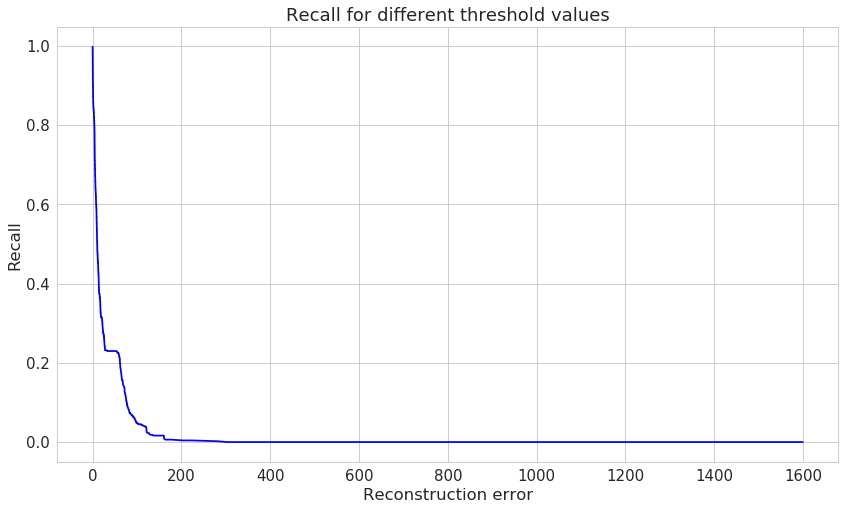

In [54]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

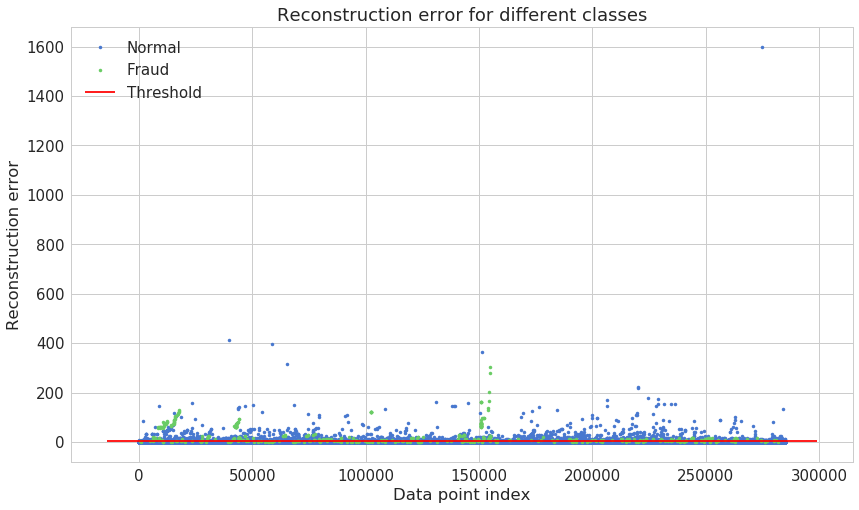

In [65]:
threshold = 2.9

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

             precision    recall  f1-score   support

          0       1.00      0.98      0.99    284315
          1       0.06      0.84      0.11       492

avg / total       1.00      0.98      0.99    284807



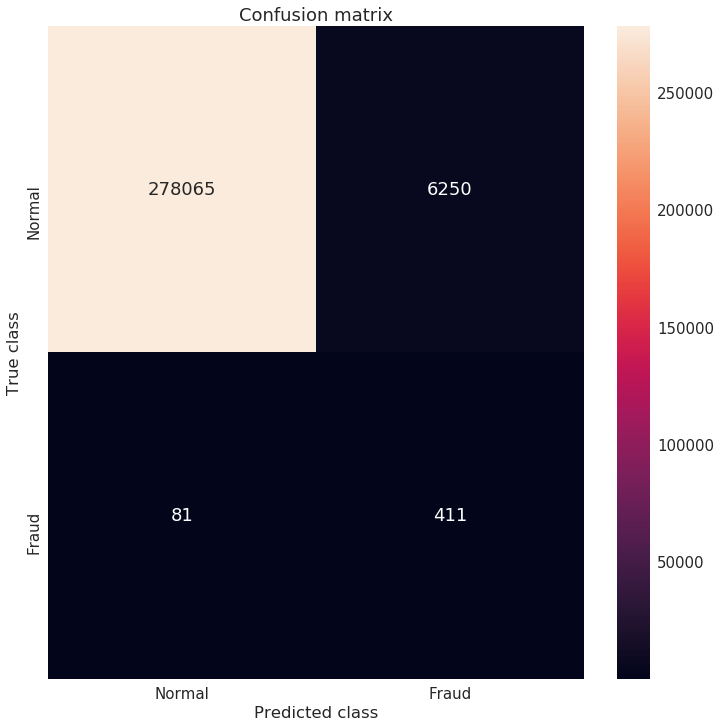

In [66]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
print(metrics.classification_report(error_df.true_class, y_pred))

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()